In [1]:
import numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

In [2]:
alt.renderers.enable('notebook')
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/all_energy_statistics.csv')
df.head()

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,NaN,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,NaN,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,NaN,additives_and_oxygenates


In [10]:
df.drop('quantity_footnotes', axis=1, inplace=True)

In [11]:
print(df['category'].value_counts())

total_electricity                                              133916
gas_oil_diesel_oil                                              97645
fuel_oil                                                        75132
natural_gas_including_lng                                       64161
liquified_petroleum_gas                                         62156
motor_gasoline                                                  53198
fuelwood                                                        52032
electricity_net_installed_capacity_of_electric_power_plants     50229
other_kerosene                                                  43466
hard_coal                                                       42307
kerosene_type_jet_fuel                                          34558
heat                                                            29656
charcoal                                                        28000
conventional_crude_oil                                          27352
other_bituminous_coa

In [12]:
US = df[df['country_or_area']=='United States'].sort_values('year')
print('US :%f', US.shape)
BR= df[df['country_or_area']=='Brazil'].sort_values('year')
print('BR: %f', BR.shape)
CAN = df[df['country_or_area']=='Canada'].sort_values('year')
print('CAN: %f', CAN.shape)
CHI = df[df['country_or_area']=='China'].sort_values('year')
print('CHI: %f', CHI.shape)
IND = df[df['country_or_area']=='India'].sort_values('year')
print('IND: %f', IND.shape)
JAP = df[df['country_or_area']=='Japan'].sort_values('year')
print('JAP: %f', JAP.shape)
UK =df[df['country_or_area']=='United Kingdom'].sort_values('year')
print('UK: %f', UK.shape)

#List of countries to make the European Union.
SP = df[df['country_or_area']=='Spain'].sort_values('year')
print('SP: %f', SP.shape)
ITA = df[df['country_or_area']=='Italy'].sort_values('year')
print('ITA: %f', ITA.shape)
GER = df[df['country_or_area']=='Germany'].sort_values('year')
print('GER: %f', GER.shape)
FRA = df[df['country_or_area']=='France'].sort_values('year')
print('FRA: %f', FRA.shape)
NETH = df[df['country_or_area']=='Netherlands'].sort_values('year')
print('NETH: %f', NETH.shape)

US :%f (19847, 6)
BR: %f (10374, 6)
CAN: %f (15453, 6)
CHI: %f (11563, 6)
IND: %f (7775, 6)
JAP: %f (17037, 6)
UK: %f (15536, 6)
SP: %f (15815, 6)
ITA: %f (16312, 6)
GER: %f (20422, 6)
FRA: %f (17236, 6)
NETH: %f (15955, 6)


In [21]:
IND_WIND = IND[IND['commodity_transaction'] == "Electricity - total wind production"]

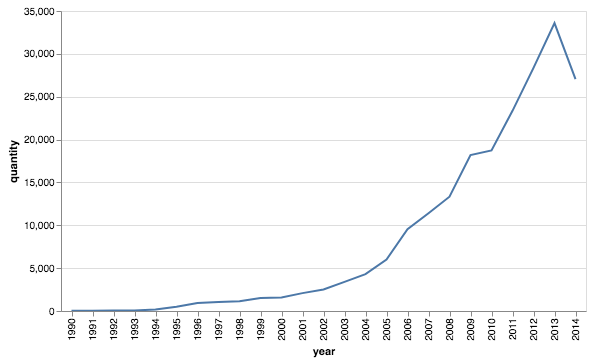

In [35]:
alt.Chart(IND_WIND).mark_line().encode(
    alt.X('year:N'),
    alt.Y('quantity:Q'),
)

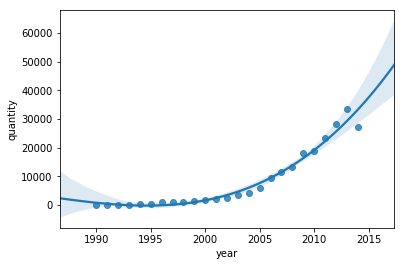

In [40]:
sns.regplot(IND_WIND['year'], IND_WIND['quantity'], order=3)

In [84]:
US_WIND = US[US['commodity_transaction'] == "Electricity - total wind production"]
BR_WIND = BR[BR['commodity_transaction'] == "Electricity - total wind production"]
CAN_WIND = CAN[CAN['commodity_transaction'] == "Electricity - total wind production"]
CHI_WIND = CHI[CHI['commodity_transaction'] == "Electricity - total wind production"]
JAP_WIND = JAP[JAP['commodity_transaction'] == "Electricity - total wind production"]
UK_WIND = UK[UK['commodity_transaction'] == "Electricity - total wind production"]
SP_WIND = SP[SP['commodity_transaction'] == "Electricity - total wind production"]
ITA_WIND = ITA[ITA['commodity_transaction'] == "Electricity - total wind production"]
GER_WIND = GER[GER['commodity_transaction'] == "Electricity - total wind production"]
FRA_WIND = FRA[FRA['commodity_transaction'] == "Electricity - total wind production"]
NETH_WIND = NETH[NETH['commodity_transaction'] == "Electricity - total wind production"]

In [91]:
WIND = pd.concat([US_WIND, CAN_WIND, CHI_WIND, IND_WIND, UK_WIND, GER_WIND, FRA_WIND])

In [158]:
alt.themes.enable('opaque')
chart = alt.Chart(WIND).mark_line().encode(
    alt.X('year:N', title="Year"),
    alt.Y('quantity:Q', title="Million Kilowatt-Hours"),
    alt.Color('country_or_area', legend=alt.Legend(title='Country'))
).properties(
    title="Total Wind Electricity Production: UN International Energy Statistics")
chart.save('plots/wind.png', scale_factor=7.0)

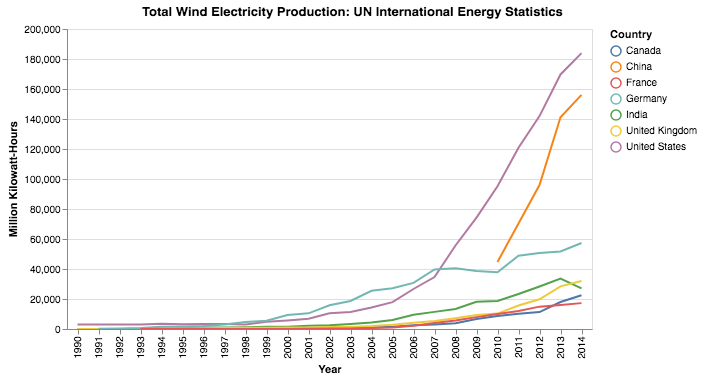

In [159]:
chart

In [105]:
US_SOLAR = US[US['commodity_transaction'] == "Electricity - total solar production"]
CAN_SOLAR = CAN[CAN['commodity_transaction'] == "Electricity - total solar production"]
CHI_SOLAR = CHI[CHI['commodity_transaction'] == "Electricity - total solar production"]
IND_SOLAR = IND[IND['commodity_transaction'] == "Electricity - total solar production"]
UK_SOLAR = UK[UK['commodity_transaction'] == "Electricity - total solar production"]
GER_SOLAR = GER[GER['commodity_transaction'] == "Electricity - total solar production"]
FRA_SOLAR = FRA[FRA['commodity_transaction'] == "Electricity - total solar production"]

In [111]:
SOLAR = pd.concat([US_SOLAR, CAN_SOLAR, CHI_SOLAR, IND_SOLAR, UK_SOLAR, GER_SOLAR, FRA_SOLAR])

In [160]:
alt.themes.enable('opaque')
chart = alt.Chart(SOLAR).mark_line().encode(
    alt.X('year:N', title="Year"),
    alt.Y('quantity:Q', title="Million Kilowatt-Hours"),
    alt.Color('country_or_area', legend=alt.Legend(title='Country'))
).properties(
    title="Total Solar Electricity Production: UN International Energy Statistics")
chart.save('plots/solar.png', scale_factor=7.0)

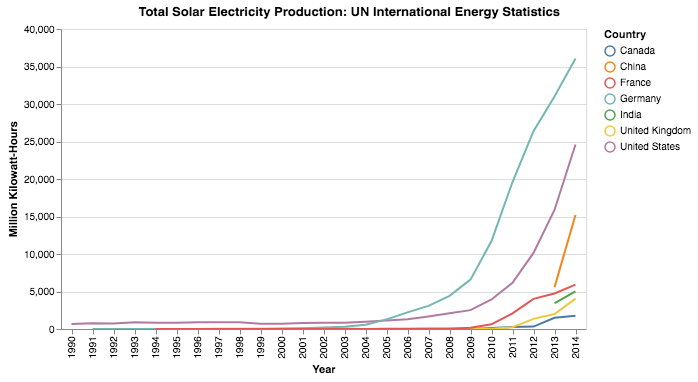

In [161]:
chart

In [114]:
US_NUCLEAR = US[US['commodity_transaction'] == "Electricity - total nuclear production"]
CAN_NUCLEAR = CAN[CAN['commodity_transaction'] == "Electricity - total nuclear production"]
CHI_NUCLEAR = CHI[CHI['commodity_transaction'] == "Electricity - total nuclear production"]
IND_NUCLEAR = IND[IND['commodity_transaction'] == "Electricity - total nuclear production"]
UK_NUCLEAR = UK[UK['commodity_transaction'] == "Electricity - total nuclear production"]
GER_NUCLEAR = GER[GER['commodity_transaction'] == "Electricity - total nuclear production"]
FRA_NUCLEAR = FRA[FRA['commodity_transaction'] == "Electricity - total nuclear production"]

In [115]:
NUCLEAR = pd.concat([US_NUCLEAR, CAN_NUCLEAR, CHI_NUCLEAR, IND_NUCLEAR, UK_NUCLEAR, GER_NUCLEAR, FRA_NUCLEAR])

In [162]:
alt.themes.enable('opaque')
chart = alt.Chart(NUCLEAR).mark_line().encode(
    alt.X('year:N', title="Year"),
    alt.Y('quantity:Q', title="Million Kilowatt-Hours"),
    alt.Color('country_or_area', legend=alt.Legend(title='Country'))
).properties(
    title="Total Nuclear Electricity Production: UN International Energy Statistics")
chart.save('plots/nuclear.png', scale_factor=7.0)

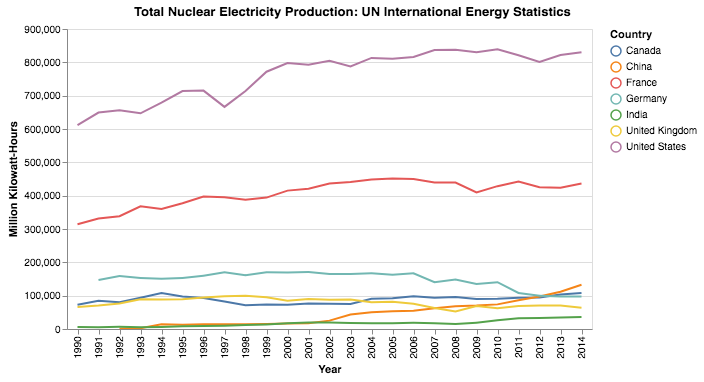

In [163]:
chart

In [120]:
ENERGY=pd.concat([WIND, NUCLEAR, SOLAR]).sort_values('year')

In [164]:
alt.themes.enable('opaque')
chart = alt.Chart(ENERGY).mark_bar().encode(
    alt.X('year:N', title="Year"),
    alt.Y('quantity:Q', title="Million Kilowatt-Hours"),
    alt.Color('country_or_area', legend=alt.Legend(title='Country'))
).properties(
    title="Total Wind, Solar, and Nuclear Production: UN International Energy Statistics")
chart.save('plots/energy_country_stack.png', scale_factor=7.0)

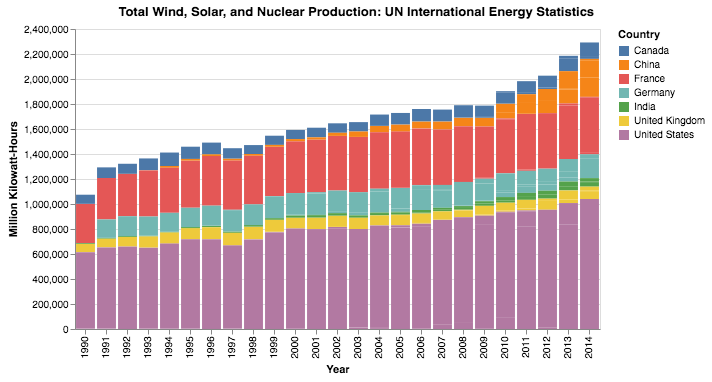

In [165]:
chart

In [124]:
IND_ENERGY=pd.concat([IND_WIND, IND_NUCLEAR, IND_SOLAR]).sort_values('year')

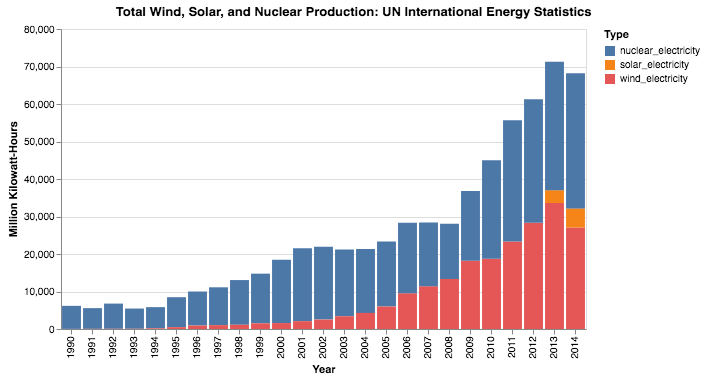

In [157]:
alt.themes.enable('opaque')
alt.Chart(IND_ENERGY).mark_bar().encode(
    alt.X('year:N', title="Year"),
    alt.Y('quantity:Q', title="Million Kilowatt-Hours"),
    alt.Color('category', legend=alt.Legend(title='Type'))
).properties(
    title="Total Wind, Solar, and Nuclear Production: UN International Energy Statistics")

In [166]:
alt.themes.enable('opaque')
c1 = alt.Chart(NUCLEAR).mark_rect().encode(
    alt.X('year:N', title="Year"),
    alt.Y('country_or_area:N', title="Million Kilowatt-Hours"),
    color='quantity:Q'
).properties(
    title="Total Nuclear Production: UN International Energy Statistics")

c2 = alt.Chart(WIND).mark_rect().encode(
    alt.X('year:N', title="Year"),
    alt.Y('country_or_area:N', title="Million Kilowatt-Hours"),
    color='quantity:Q'
).properties(
    title="Total Wind Production: UN International Energy Statistics")

c3 = alt.Chart(SOLAR).mark_rect().encode(
    alt.X('year:N', title="Year"),
    alt.Y('country_or_area:N', title="Million Kilowatt-Hours"),
    color='quantity:Q'
).properties(
    title="Total Solar Production: UN International Energy Statistics")

chart = (c1&c2&c3).resolve_scale(color='independent')
chart.save('plots/heatmap.png', scale_factor=7.0)